<a href="https://colab.research.google.com/github/Pooja2807/DB_Project/blob/master/Diabetes6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2.1 Get the file
downloaded = drive.CreateFile({'id':'1L_vpw2Duz5TXw7UPECzRM4y28pJRjQUT'}) 
downloaded.GetContentFile('diabetes1.csv') 


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt 
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support 
from plotly import __version__
import plotly
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()


In [0]:
diabetes=pd.read_csv("diabetes1.csv")
print(diabetes.shape)

(768, 9)


In [0]:
diabetes.iplot(kind="scatter", mode='markers')

In [0]:
diabetes.scatter_matrix()


In [0]:
diabetes["Age"].iplot(kind="histogram")

In [0]:
diabetes.iplot(kind = 'bar', x = 'Age', y = 'Pregnancies')

In [0]:
diabetes.sample(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
113,4,76,62,0,0,34.0,0.391,25,0
570,3,78,70,0,0,32.5,0.270,39,0
5,5,116,74,0,0,25.6,0.201,30,0
127,1,118,58,36,94,33.3,0.261,23,0
220,0,177,60,29,478,34.6,1.072,21,1
588,3,176,86,27,156,33.3,1.154,52,1
133,8,84,74,31,0,38.3,0.457,39,0
67,2,109,92,0,0,42.7,0.845,54,0
616,6,117,96,0,0,28.7,0.157,30,0
311,0,106,70,37,148,39.4,0.605,22,0


In [0]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
#finding out if the dataset contains any null value.Thus we don't get any missing values.
diabetes.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [0]:
#showing the information of the name of the columns with their meanings
info = ["Number of times pregnant",
"Plasma glucose concentration a 2 hours in an oral glucose tolerance test",
"Diastolic blood pressure (mm Hg)",
"Triceps skin fold thickness (mm)",
"2-Hour serum insulin (mu U/ml)",
"Body mass index (weight in kg/(height in m)^2)",
"Diabetes pedigree function",
"Age (years)",
"Class variable (0 or 1) 268 of 768 are 1, the others are 0"]
for i in range (len(info)):
    print(diabetes.columns[i],"-->",info[i])



Pregnancies --> Number of times pregnant
Glucose --> Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure --> Diastolic blood pressure (mm Hg)
SkinThickness --> Triceps skin fold thickness (mm)
Insulin --> 2-Hour serum insulin (mu U/ml)
BMI --> Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction --> Diabetes pedigree function
Age --> Age (years)
Outcome --> Class variable (0 or 1) 268 of 768 are 1, the others are 0


In [0]:
x=diabetes.iloc[:,0:8]
y=diabetes.iloc[:,-1]

In [0]:
#minmax scaler used generally
#normalizer, converts middle values to 0 or 1
#standard, it divides with the constant term, it is used in linear data
Standard=StandardScaler()
x=Standard.fit_transform(x)
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [0]:
#finding the unique value for the outcomes i.e 1 and 0
y.unique()



array([1, 0])

In [0]:
#Extracting data from the dataset
diabetes.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



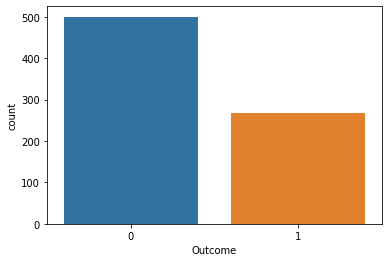

In [0]:
import seaborn as sns
sns.countplot(diabetes['Outcome'],label="Count")

In [0]:
diabetes.isna().sum()



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [0]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [0]:
diabetes.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

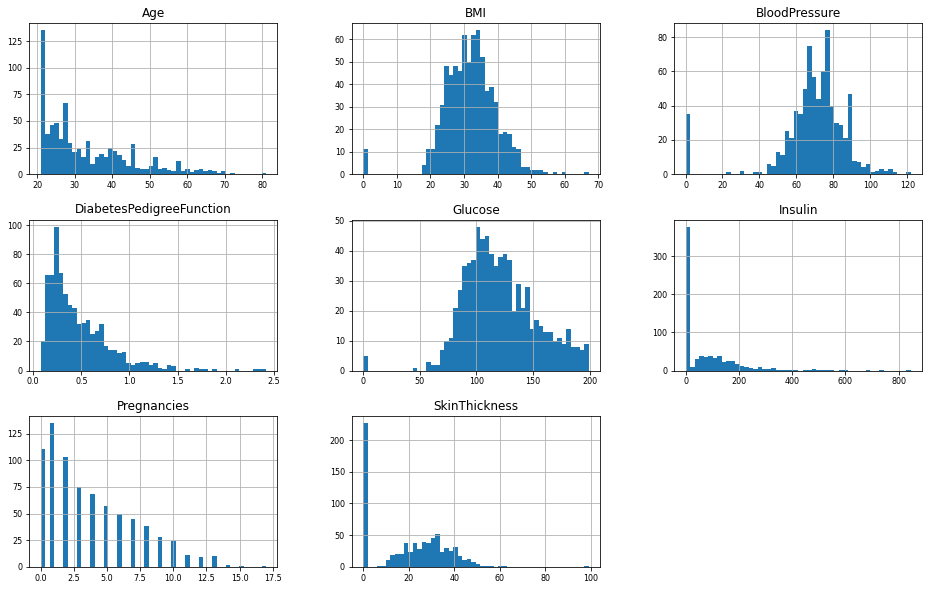

In [0]:
#Ckecking Outlier and Gaussian shape
diabetes[['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']].hist(figsize=(16, 10), bins=50, xlabelsize=8, ylabelsize=8);



In [0]:
#Outlier Cleaning

diabetes=diabetes[diabetes['Pregnancies']<=11]
diabetes=diabetes[diabetes['BMI']>=12]
diabetes=diabetes[diabetes['BloodPressure']>40]
diabetes=diabetes[diabetes['Glucose']>40]
diabetes=diabetes[diabetes['SkinThickness']<60]



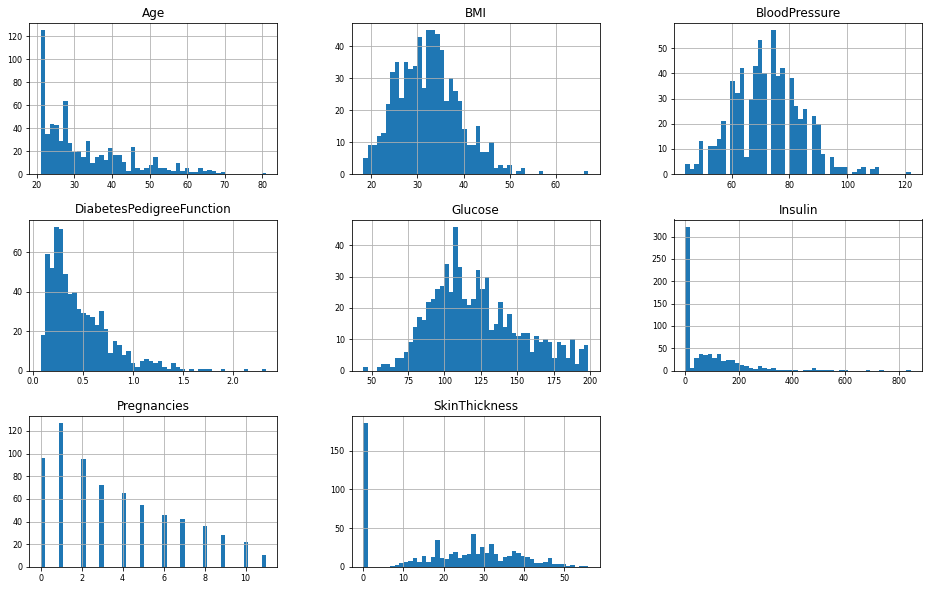

In [0]:
diabetes[['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']].hist(figsize=(16, 10), bins=50, xlabelsize=8, ylabelsize=8);

Text(0.5, 1.0, 'Correlation between different fearures')

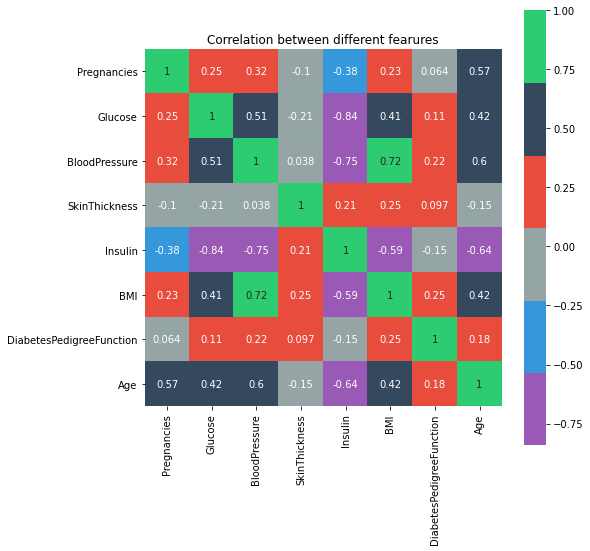

In [0]:
#Correlation

from sklearn.preprocessing import Normalizer
normalized_application = Normalizer().fit_transform(diabetes[['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']])
#print (normalized_application)

normal_df=pd.DataFrame(normalized_application)
normal_df.columns=['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

cor=normal_df.corr()
plt.figure(figsize=(8,8))
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.heatmap(cor, vmax=1, square=True,annot=True,cmap=flatui)
plt.title('Correlation between different fearures')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



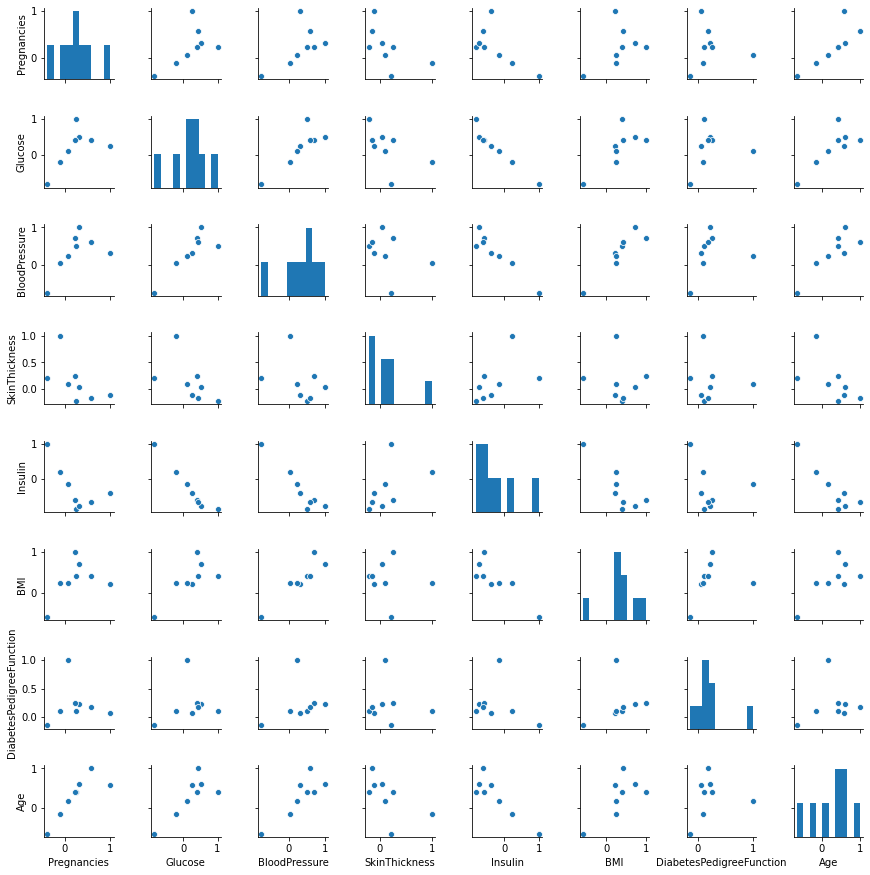

In [0]:
colnames=['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']
sns.pairplot(cor[colnames],size=1.5,x_vars=colnames,y_vars=colnames)

plt.show()

In [0]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [0]:
normal_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [0]:
print(diabetes.shape)
print(normal_df.shape)



(694, 9)
(694, 8)


In [0]:
diatbetes=diabetes.reset_index(drop=True)

In [0]:
normal_df=normal_df.reset_index(drop=True)

In [0]:
normal_df['Outcome'] = diabetes.Outcome.values

In [0]:
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(normal_df, test_size=0.30)

In [0]:
print(df_train.shape)
print(df_val.shape)

(485, 9)
(209, 9)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=7)
print (x_train)



[[ 0.3429808  -0.40356202  0.14964075 ...  0.52131088 -0.63083122
  -0.0204964 ]
 [-0.54791859 -0.59134489  0.87340925 ...  1.71435179 -1.04156736
  -0.87137393]
 [ 0.04601433  1.16129525  0.45982725 ...  0.1151693   1.00003286
  -0.19067191]
 ...
 [-1.14185152 -1.99971643 -0.47073225 ... -1.30632625  0.79466479
   2.87248721]
 [-0.84488505 -0.49745345 -0.57412775 ... -0.97633621 -0.86036024
  -1.04154944]
 [ 1.23388019  1.8185353   0.14964075 ...  0.08978545  0.7463429
   0.23476686]]


In [0]:
from sklearn.svm import SVC
ml=SVC(kernel="linear", C=0.1)

In [0]:
ml.fit(x_train,y_train)
y_test


353    0
236    1
323    1
98     0
701    1
      ..
153    0
392    0
308    1
70     1
513    0
Name: Outcome, Length: 154, dtype: int64

In [0]:
y_pred_lsvc=ml.predict(x_test)

In [0]:
from numpy import round
score_lsvc = round(accuracy_score(y_pred_lsvc,y_test)*100,2)
print("The accuracy score of Linear SVM is " ,score_lsvc, "%")

The accuracy score of Linear SVM is  79.22 %


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
randomforest=RandomForestClassifier()

In [0]:
randomforest.fit(x_train,y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
ss=randomforest.predict(x_test)

In [0]:
from numpy import round
score_randomforest = round(accuracy_score(ss,y_test)*100,2)
print("The accuracy score of Random Forest is " ,score_randomforest, "%")

The accuracy score of Random Forest is  79.22 %


In [0]:
#using logistic regression
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)



In [0]:
from numpy import round
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)
print("The accuracy score of Logistic Regression is " ,score_lr, "%")

The accuracy score of Logistic Regression is  78.57 %


In [0]:
from sklearn.metrics import confusion_matrix,roc_curve,auc

In [0]:
#calculation of the confusion matrix of used algorihm i.e Random Forest Classifier
confusion_matrix(ss,y_test)

array([[89, 24],
       [ 8, 33]])

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, ss)
#calculating the false positive rate
fpr

array([0.        , 0.08247423, 1.        ])

In [0]:
#calculating the true positive rate
tpr

array([0.        , 0.57894737, 1.        ])

In [0]:
#calculating the thresholds
thresholds

array([2, 1, 0])

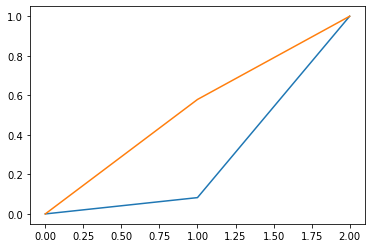

In [0]:
#plotting the false positive rate and true positive rate in 2D graph
plt.plot(fpr)
plt.plot(tpr)

In [0]:

#calculating area_curve of fpr and tpr
area_curve=auc(fpr,tpr)

In [0]:
area_curve


0.7482365708084644

In [0]:
#for calculation of f1 score
precision_recall_fscore_support(y_test, ss, average='weighted')



(0.7940018108375544, 0.7922077922077922, 0.7831610566304446, None)

In [0]:
from sklearn.linear_model import LogisticRegression
features = normal_df.drop(["Outcome"], axis=1).columns

logreg = LogisticRegression().fit(df_train[features], df_train['Outcome'])



print("Training set score: {:.3f}".format(logreg.score(df_train[features], df_train['Outcome'])))
print("Validation set score: {:.3f}".format(logreg.score(df_val[features], df_val['Outcome'])))

Training set score: 0.678
Validation set score: 0.641


In [0]:
#2.1 Get the file
downloaded = drive.CreateFile({'id':'1XLAd2gyQ-M89RLzsYWz0JmkL1PGgsgZb'}) 
downloaded.GetContentFile('testdiabetes.csv') 

In [0]:
testdiabetes=pd.read_csv("testdiabetes.csv")
print(testdiabetes.shape)



(1, 8)


In [0]:
normalized = Normalizer().fit_transform(testdiabetes)
#print (normalized_application)

normal_test=pd.DataFrame(normalized)
normal_test.columns=['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']


prediction=logreg.predict(normal_test)

In [0]:
print(prediction)


[0]
